emotion
neutral      1144
happiness     949
surprise       61
sadness        44
anger          42
disgust        34
Name: count, dtype: int64


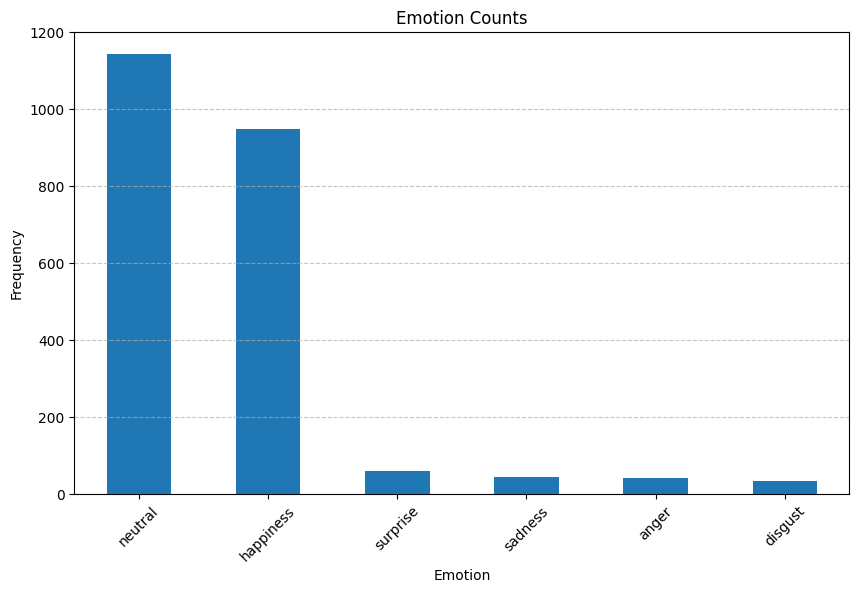

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


df = pd.read_csv('modified/1over6_original.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### sample_2000

## 2. Train the model

In [3]:
# Path
csv_file = 'modified/legend_modified.csv' 
image_dir = 'images/'         

#Read
data = pd.read_csv(csv_file, header=None, names=['user_id', 'image', 'emotion'])

image_size = (224, 224) 
images = []
labels = []
for _, row in data.iterrows():
    image_path = os.path.join(image_dir, row['image'])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size) / 255.0  
        images.append(img)
        labels.append(row['emotion'])

#convert to numpy arrays
images = np.array(images)
labels = pd.get_dummies(labels).values 

# Visualize the data:

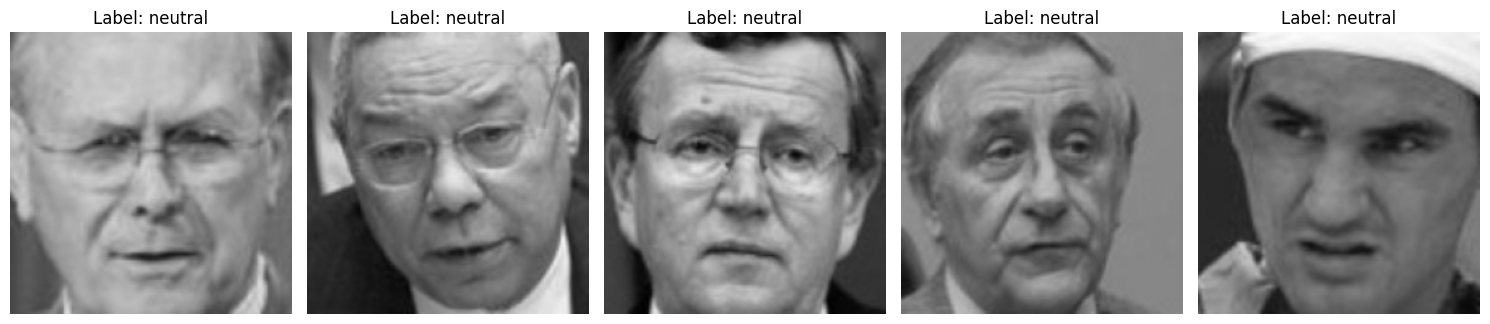

In [15]:
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {data['emotion'][i+1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Prepare the dataset, utilizes data augmentation

In [4]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [5]:
np.unique(y_train)


array([False,  True])

In [6]:
integer_labels = np.argmax(labels, axis=1)

class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(integer_labels), 
    y=integer_labels
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 9.034391534391535, 1: 10.945512820512821, 2: 0.3996956928838951, 3: 0.33148903125606677, 4: 8.49502487562189, 5: 6.186594202898551}


Training with weight adjustment 1/2


c:\Users\Eric\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.3201 - loss: 1.6426 - val_accuracy: 0.0385 - val_loss: 1.7857
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.1592 - loss: 1.6865 - val_accuracy: 0.0495 - val_loss: 1.7888
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.2989 - loss: 1.5460 - val_accuracy: 0.1758 - val_loss: 1.7549
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.3173 - loss: 1.4113 - val_accuracy: 0.3407 - val_loss: 1.4723
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.4761 - loss: 1.2300 - val_accuracy: 0.4505 - val_loss: 1.3985
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.5546 - loss: 0.9692 - val_accuracy: 0.4835 - val_loss: 1.3684
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.6480 - loss: 0.6810 - val_accuracy: 0.5989 - val_loss: 1.1609
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.6282 - loss: 0

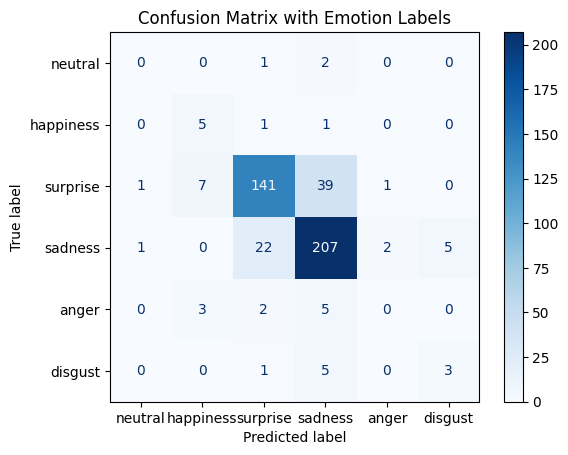

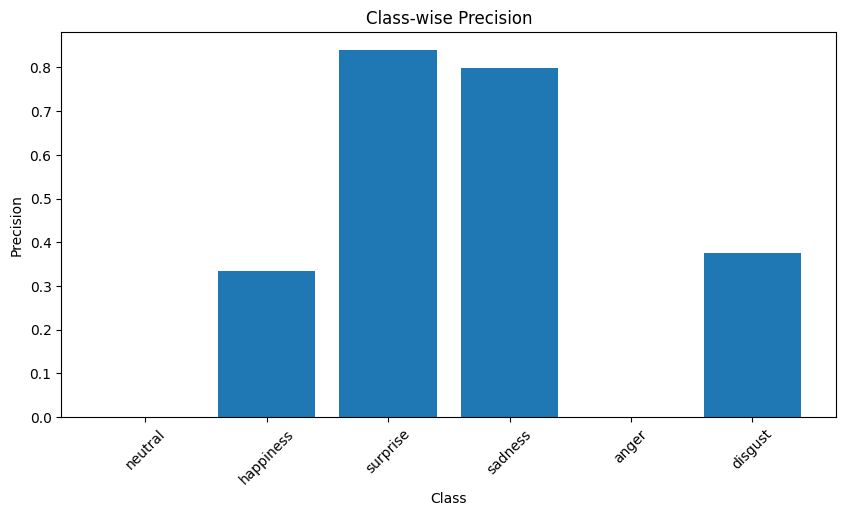

Training with weight adjustment 2/2


c:\Users\Eric\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 133ms/step - accuracy: 0.0319 - loss: 2.3363 - val_accuracy: 0.0330 - val_loss: 2.5281
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.0272 - loss: 2.8120 - val_accuracy: 0.0385 - val_loss: 2.3857
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.0373 - loss: 2.4162 - val_accuracy: 0.0440 - val_loss: 2.1901
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.0523 - loss: 2.2321 - val_accuracy: 0.0330 - val_loss: 2.3400
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.0930 - loss: 1.9497 - val_accuracy: 0.1209 - val_loss: 1.7946
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.2022 - loss: 1.5335 - val_accuracy: 0.3516 - val_loss: 1.7511
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.2916 - loss: 1.3614 - val_accuracy: 0.4505 - val_loss: 1.3566
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.3962 - loss: 0

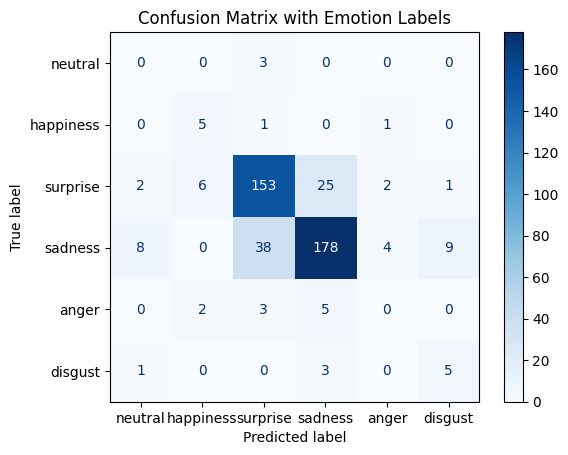

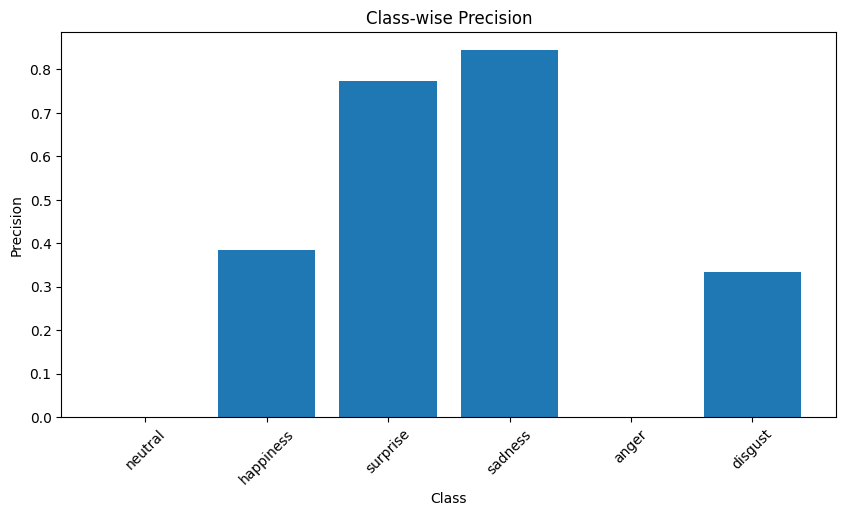

In [19]:
from sklearn.metrics import precision_score

#adjusting weight and evaluate which one performs the best
def adjust_weights(class_weights, adjustments):
    new_weights = class_weights.copy()
    for class_idx, adjustment in adjustments.items():
        new_weights[class_idx] *= adjustment
    return new_weights


weight_adjustments = [
    {0: 2, 1: 1.2, 2: 0.7, 3: 0.7, 4:2, 5:1.5},  
  
]


results = []

for i, adjustments in enumerate(weight_adjustments):
    print(f"Training with weight adjustment {i+1}/{len(weight_adjustments)}")
    
    # Apply weight adjustments
    new_weights = class_weights_dict.copy()
    for class_idx, adjustment in adjustments.items():
        new_weights[class_idx] *= adjustment

    model = models.Sequential([
        layers.Conv2D(32, (7, 7), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),  
        layers.Dense(labels.shape[1], activation='softmax')  
    ])

    optimizer = Adam(learning_rate=0.0001)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=16, class_weight=new_weights)

    y_pred = model.predict(X_test)
    emotion_labels = data[1:]['emotion'].unique()

    y_pred_classes = y_pred.argmax(axis=1)
    y_true_classes = y_test.argmax(axis=1)

    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=emotion_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix with Emotion Labels')
    plt.show()
    report = classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels, output_dict=True, zero_division=0)
    class_precisions = [report[label]['precision'] for label in emotion_labels if label in report]

    # Plot class-wise precision
    plt.figure(figsize=(10, 5))
    plt.bar(emotion_labels, class_precisions)  
    plt.title('Class-wise Precision')
    plt.xlabel('Class')
    plt.ylabel('Precision')
    plt.xticks(rotation=45)
    plt.show()




In [20]:
for i, arr in enumerate(results):
    labels = range(1, len(arr) + 1)  # Adjust labels to match the length of the array
    plt.figure()
    plt.bar(labels, arr, tick_label=labels, alpha=0.75, edgecolor='black')
    plt.title(f'Histogram for Array {i+1}')
    plt.xlabel('Label (1-N)')
    plt.ylabel('Precision')
    plt.xticks(labels)  # Ensure x-axis ticks match the labels
    plt.grid(axis='y')
    plt.show()

In [21]:
results

[]

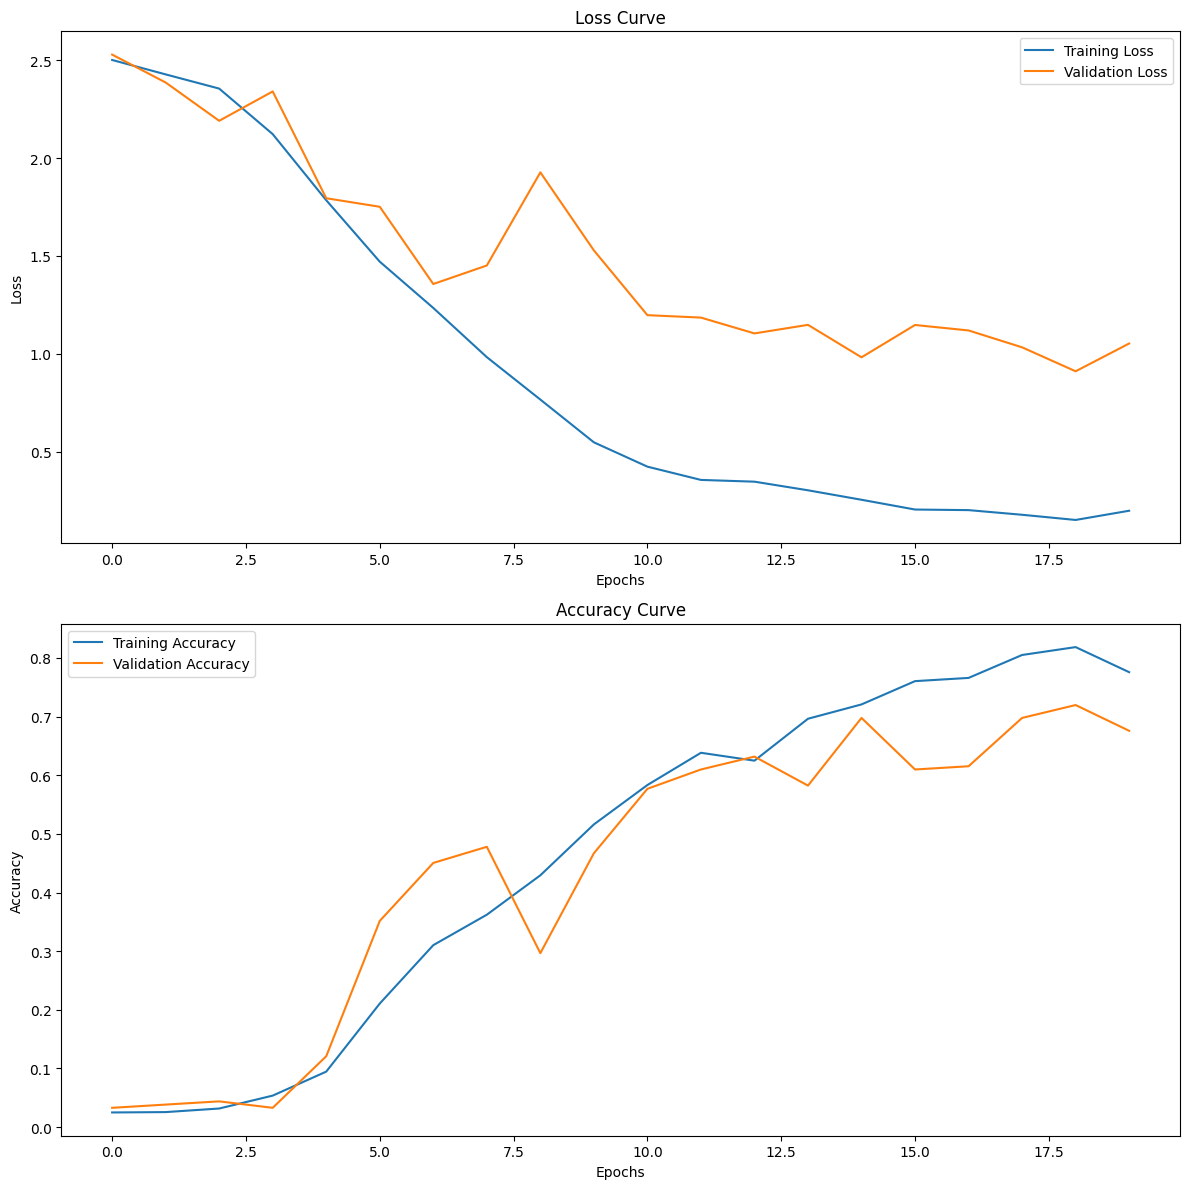

In [22]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


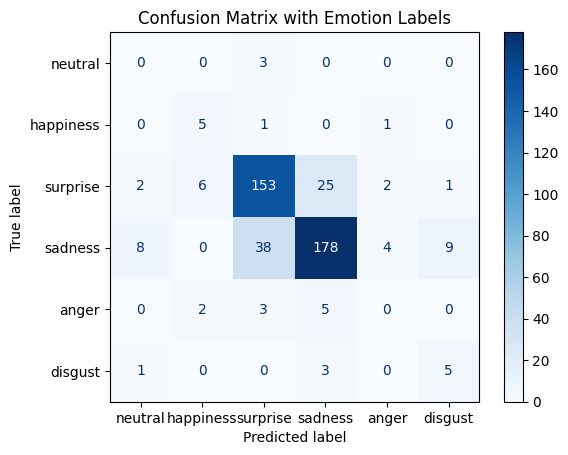

In [23]:
y_pred = model.predict(X_test)
emotion_labels = data[1:]['emotion'].unique()

y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=emotion_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Emotion Labels')
plt.show()

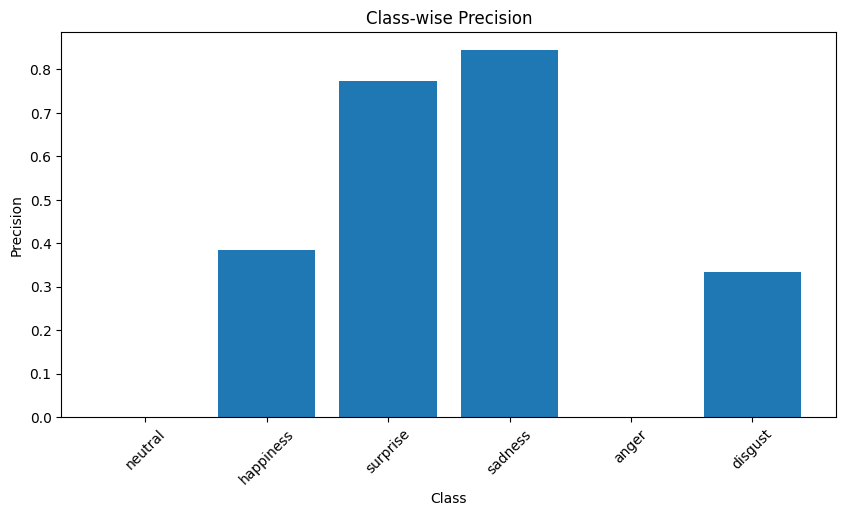

In [24]:
report = classification_report(y_true_classes, y_pred_classes, target_names=emotion_labels, output_dict=True, zero_division=0)
class_precisions = [report[label]['precision'] for label in emotion_labels if label in report]

# Plot class-wise precision
plt.figure(figsize=(10, 5))
plt.bar(emotion_labels, class_precisions)  # Use class labels for the x-axis
plt.title('Class-wise Precision')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()